<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/requests_gradio(%EA%B3%B5%EB%8F%99%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio
import gradio as gr
import requests
import pandas as pd

In [36]:
URL = ('http://apis.data.go.kr/1611000/nsdi/ApartHousingPriceService/wms/getApartHousingPriceWMS?ServiceKey=miH%2BZXg85lQy4%2FkmhffvygXDIFiTwisriSLxtyECSzw6hxTVK7yI8QKIOc7mP7LEqCnhBGuj6iW1gZW65dum7A%3D%3D&layers=163&crs=EPSG:5174&bbox=191000.225,447240.534,191179.03,447423.308&width=915&height=700&format=image/png&transparent=false&bgcolor=0xFFFFFF&exceptions=blank')
response = requests.get(URL)

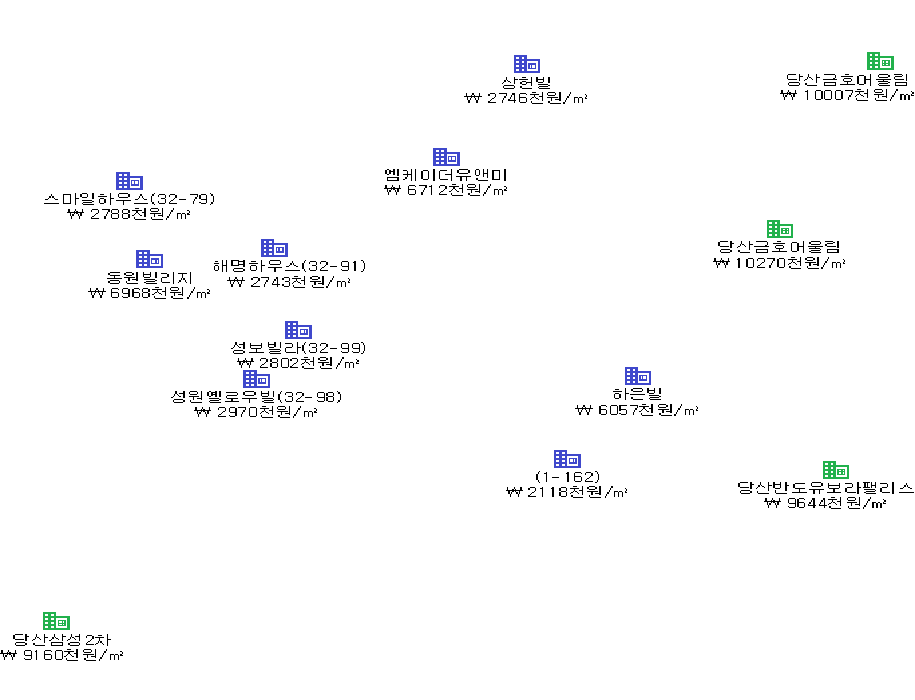

In [48]:
from IPython.display import Image, display
display(Image(response.content))

In [10]:
URL = ('http://apis.data.go.kr/B552584/ArpltnStatsSvc/'
      'getCtprvnMesureSidoLIst?'
      'sidoName=서울'
      '&searchCondition=hour'
      '&pageNo=1'
      '&numOfRows=100'
      '&returnType=json'
      '&serviceKey=miH%2BZXg85lQy4%2FkmhffvygXDIFiTwisriSLxtyECSzw6hxTVK7yI8QKIOc7mP7LEqCnhBGuj6iW1gZW65dum7A%3D%3D')
response = requests.get(URL)

#### http://jsonviewer.stack.hu/ (copy json here to view json)

In [ ]:
r = response.json()
r

In [ ]:
items = r['response']['body']['items']

cityName = [item['cityName'] for item in items]
pm10Value = [item['pm10Value'] for item in items]
pm25Value = [item['pm25Value'] for item in items]
so2Value = [item['so2Value'] for item in items]
coValue = [item['coValue'] for item in items]
o3Value = [item['o3Value'] for item in items]
no2Value = [item['no2Value'] for item in items]

cityName = pd.Series(cityName)
pm10Value = pd.Series(pm10Value)   
pm25Value = pd.Series(pm25Value)
so2Value = pd.Series(so2Value)
coValue = pd.Series(coValue)
o3Value = pd.Series(o3Value)
no2Value = pd.Series(no2Value)

df = pd.DataFrame({ 'cityName': cityName, 'pm10Value': pm10Value, 'pm25Value': pm25Value, 'so2Value': so2Value, 'coValue': coValue, 'o3Value': o3Value, 'no2Value': no2Value})

In [ ]:
def test(sidoName):
  URL = ('http://apis.data.go.kr/B552584/ArpltnStatsSvc/'
      'getCtprvnMesureSidoLIst?'
      'sidoName='+sidoName+
      '&searchCondition=hour'
      '&pageNo=1'
      '&numOfRows=100'
      '&returnType=json'
      '&serviceKey=miH%2BZXg85lQy4%2FkmhffvygXDIFiTwisriSLxtyECSzw6hxTVK7yI8QKIOc7mP7LEqCnhBGuj6iW1gZW65dum7A%3D%3D')
  
  response = requests.get(URL)
  r = response.json()
  items = r['response']['body']['items']

  cityName = [item['cityName'] for item in items]
  pm10Value = [item['pm10Value'] for item in items]
  pm25Value = [item['pm25Value'] for item in items]
  so2Value = [item['so2Value'] for item in items]
  coValue = [item['coValue'] for item in items]
  o3Value = [item['o3Value'] for item in items]
  no2Value = [item['no2Value'] for item in items]

  cityName = pd.Series(cityName)
  pm10Value = pd.Series(pm10Value)   
  pm25Value = pd.Series(pm25Value)
  so2Value = pd.Series(so2Value)
  coValue = pd.Series(coValue)
  o3Value = pd.Series(o3Value)
  no2Value = pd.Series(no2Value)

  df = pd.DataFrame({ 'cityName': cityName, 'pm10Value': pm10Value, 'pm25Value': pm25Value, 'so2Value': so2Value, 'coValue': coValue, 'o3Value': o3Value, 'no2Value': no2Value})
  return df

In [ ]:
iface = gr.Interface(test, gr.inputs.Dropdown(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']), outputs=['dataframe'])
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://14609.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
